In [17]:
# Package Imports - feel free to add what you think might be useful! 
%pip install requests
import requests
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import Counter

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Task 3: Quest for Quantum Randomness

### Part A: Truly Different

In [20]:
""" 
Using the QRNGaaS User Manual provided, 
write Python code to get random numbers from IDQuantique's Quantum Random Number Generators. 

The API documentation is available at: https://drive.google.com/file/d/1OkyRUP7HC4dbmi8OvoT4EuvXqRVGdsjD/view
You'll probably reuse this code for Task 4. So write it well!

If you are unfamiliar with writing HTTP requests in Python, 
https://www.w3schools.com/python/module_requests.asp

If you're really stuck, this can definitely help. Though we encourage you to read the documentation yourself! 
https://curlconverter.com/python/
"""
def get_samples(n):
    url = "https://qrng.idqloud.com/api/1.0/short"
    headers = {"X-API-KEY": "aTo4BKRvnc49uRWDk034zaua87vGRXKk9TMLdfkI"}
    params = {"min": -32768, "max": 32767, "quantity": n}
    response = requests.get(url, headers=headers, params=params)
    return response.json()['data']
    


In [14]:
def compute_entropy(X):
    """ 
    You can pass in the random variable X in whatever form you choose.
    One way to represent a random variable is as a dictionary, 
    where each (key, value) pair represents an outcome x 
    and its probability P(X = x)

    Hint: NumPy might be helpful here!
    """

    # Shannon Entropy

    return -(X * np.log(X)).sum()

In [15]:
"""
To get started, we provide a simple example of how to use the API to generate 10 int16 random numbers.
In particular, observe where we pass in the min and max parameters to specify the range of random numbers we want
and the quantity parameter to specify how many random numbers we want.
Here is the API KEY you will need to use: aTo4BKRvnc49uRWDk034zaua87vGRXKk9TMLdfkI
"""
# Curl isn't working
# !curl "https://qrng.idqloud.com/api/1.0/short?max=32767&min=-32768&quantity=10" -X GET -H "X-API-KEY: aTo4BKRvnc49uRWDk034zaua87vGRXKk9TMLdfkI"

sample_sizes = range(10, 65)
entropy_values = []

for n in sample_sizes:
    samples = get_samples(n)
    
    counts = Counter(samples)
    total = sum(counts.values())
    prob_dist = np.array([count / total for count in counts.values()])

    entropy = compute_entropy(prob_dist)
    entropy_values.append(entropy)

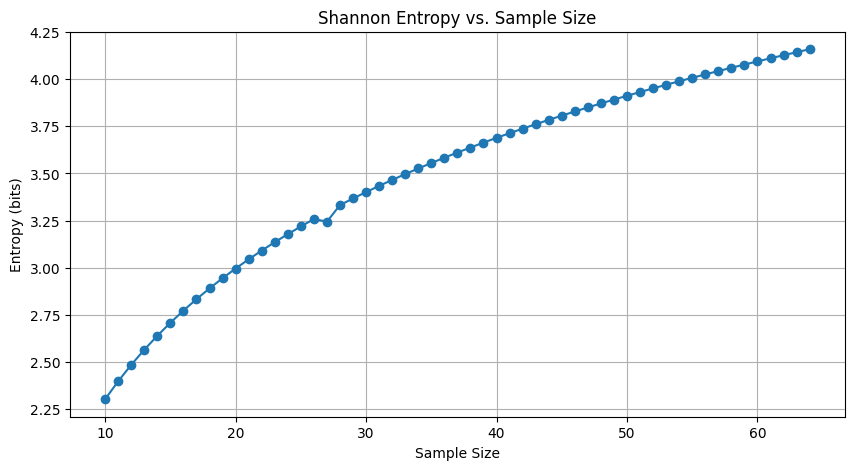

Generated 10 values in 0.7196 seconds
Estimated bits per value: 16
Total bits: 160
Bitrate: 222.35 bits/second


In [22]:
"""
You can paste the other environmental entropy based TRNGs from Task 2 and compare the performance
Compare your written QRNG to the previous TRNGs. Be sure to compare them with respect to bitrate and entropy.
"""
def plot_entropy():
    plt.figure(figsize=(10, 5))
    plt.plot(sample_sizes, entropy_values, marker='o')
    plt.title("Shannon Entropy vs. Sample Size")
    plt.xlabel("Sample Size")
    plt.ylabel("Entropy (bits)")
    plt.grid(True)
    plt.show()


def get_bitrate():
    N = 10
    start_time = time.time()
    samples = get_samples(N)
    end_time = time.time()
    elapsed_time = end_time - start_time

    bits_per_value = 16 # for int16

    total_bits = N * bits_per_value

    bitrate = total_bits / elapsed_time

    print(f"Generated {N} values in {elapsed_time:.4f} seconds")
    print(f"Estimated bits per value: {bits_per_value}")
    print(f"Total bits: {total_bits}")
    print(f"Bitrate: {bitrate:.2f} bits/second")

plot_entropy()
get_bitrate()

### Part B: Easy as Pi!

[-0.87191577 -0.28007935 -0.35210193 -0.88400092 -0.31746395 -0.06907759
  0.54378576 -0.71712825 -0.56295109 -0.64855421  0.83666743 -0.63320363
 -0.59517815  0.96859693  0.70107576  0.53795682  0.23164721  0.18980697
  0.95870909 -0.45357443 -0.98669413  0.0799115  -0.62539101  0.48287175
 -0.76443122  0.49144732 -0.62877852 -0.84881361 -0.80834668  0.27895018
  0.46541543  0.2830396  -0.69921416 -0.10725566  0.2314641  -0.6783093
 -0.05543603  0.87438773  0.62072175  0.48876173  0.81490806  0.92867933
  0.58385595  0.45271992  0.90652323  0.60234989 -0.4278172  -0.36345464
 -0.31398489 -0.58846418 -0.76336309 -0.05186542  0.39867247  0.79330129
  0.63521782  0.77566186  0.46776532 -0.19398795 -0.35121691  0.18541238
  0.50386816 -0.39971008 -0.92965591 -0.09465171]
Min: -0.9866941329060808 Max: 0.9685969329365987
Estimated π using QRNG and N=64: 3.125000


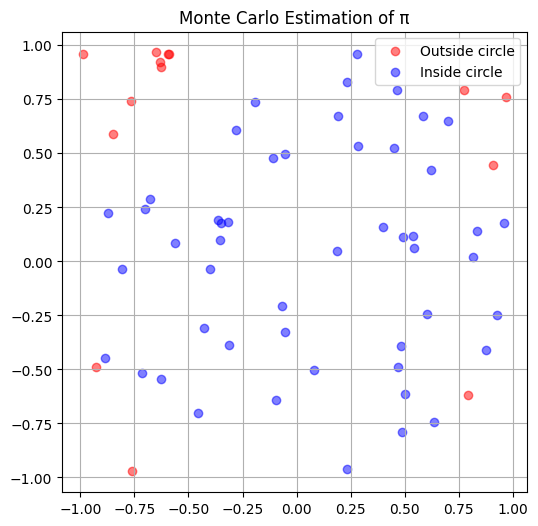

In [56]:
"""
Implement the Monte Carlo algorithm for estimating Pi using your various sources of randomness. 

If you are stuck on how to implement the algorithm: 
https://www.geeksforgeeks.org/estimating-value-pi-using-monte-carlo/
"""
def get_qrng_floats(n, min_val=-32768, max_val=32767):
    url = "https://qrng.idqloud.com/api/1.0/short"
    headers = {"X-API-KEY": "aTo4BKRvnc49uRWDk034zaua87vGRXKk9TMLdfkI"}
    params = {"min": min_val, "max": max_val, "quantity": n}
    response = requests.get(url, headers=headers, params=params)
    raw = np.array(response.json()['data'], dtype=np.float64)
    
    # Scale to [-1, 1]
    scaled = 2 * (raw - min_val) / (max_val - min_val) - 1
    return scaled

def estimate_pi():
    r = 1
    N = 64

    
    x_vals = get_qrng_floats(N)
    print(x_vals)
    print("Min:", np.min(x_vals), "Max:", np.max(x_vals))

    y_vals = get_qrng_floats(N)

    
    dist_squared = x_vals**2 + y_vals**2
    inside_circle = dist_squared <= r**2

    pi_estimate = 4 * np.sum(inside_circle) / N
    print(f"Estimated π using QRNG and N={N}: {pi_estimate:.6f}")

    plt.figure(figsize=(6, 6))
    plt.scatter(x_vals[~inside_circle], y_vals[~inside_circle], color='red', alpha=0.5, label="Outside circle")
    plt.scatter(x_vals[inside_circle], y_vals[inside_circle], color='blue', alpha=0.5, label="Inside circle")
    plt.gca().set_aspect('equal')
    plt.title("Monte Carlo Estimation of π")
    plt.legend()
    plt.grid(True)
    plt.show()

estimate_pi()

